## Elaborado por Manuel Gonzalez

In [19]:
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [20]:
TRAINDS = pd.read_csv('D:/UMG01/houses/UPLOAD/cursoMachineLearning/application_train.csv')

In [21]:
TRAINDS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [22]:
TRAINDS.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [23]:
shape = TRAINDS.shape
shape

(307511, 122)

In [24]:
print('Cantidad de columnas :', shape[1]) 

Cantidad de columnas : 122


In [25]:
TRAINDS.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

se verifican los datos para posteriormente ser limpiados con la funcion dropna() :

In [26]:
TRAINDS.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [29]:
TRAINDS.dropna(inplace=True)

In [28]:
TRAINDS.isnull().sum()

SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 122, dtype: int64

In [30]:
TRAINDSCORR = TRAINDS.iloc[:,:]

In [31]:
TRAINDSCORR.corr()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000000,0.015474,0.005075,-0.011396,-0.013768,-0.032327,-0.016785,-0.006509,0.006310,-0.011304,...,0.022281,0.003473,-0.005464,0.006155,-0.010707,0.001187,-0.007661,-0.010726,-0.008949,-0.017236
TARGET,0.015474,1.000000,-0.019993,-0.039762,-0.014634,-0.000765,-0.021950,-0.021225,0.041108,0.062950,...,-0.006139,0.013976,-0.008259,-0.003892,0.012156,0.014616,0.015000,-0.004202,0.016465,0.033832
CNT_CHILDREN,0.005075,-0.019993,1.000000,-0.023069,-0.015191,-0.020395,-0.021157,-0.025688,0.175747,0.014600,...,-0.010280,-0.012527,-0.006602,-0.011857,-0.009919,-0.002712,-0.001043,-0.023803,-0.022028,-0.035499
AMT_INCOME_TOTAL,-0.011396,-0.039762,-0.023069,1.000000,0.348575,0.415807,0.354556,0.211133,-0.119206,-0.028260,...,0.041473,0.010493,0.003233,0.031045,0.026559,-0.001641,0.024093,0.024042,0.006707,-0.007158
AMT_CREDIT,-0.013768,-0.014634,-0.015191,0.348575,1.000000,0.751587,0.987994,0.110804,-0.198152,-0.068760,...,0.061362,0.044737,0.073881,0.016894,0.007742,0.018995,0.012926,0.056718,0.003209,-0.057768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,0.001187,0.014616,-0.002712,-0.001641,0.018995,0.014015,0.019636,-0.006398,0.018687,0.025302,...,0.005988,-0.001495,-0.002006,-0.000945,0.214817,1.000000,0.215462,-0.002107,-0.014587,0.003018
AMT_REQ_CREDIT_BUREAU_WEEK,-0.007661,0.015000,-0.001043,0.024093,0.012926,0.026397,0.014701,-0.000075,0.003329,0.004644,...,-0.007608,-0.004512,-0.006055,-0.002853,0.021885,0.215462,1.000000,-0.012199,-0.043595,0.024866
AMT_REQ_CREDIT_BUREAU_MON,-0.010726,-0.004202,-0.023803,0.024042,0.056718,0.025826,0.053417,0.081290,-0.036862,-0.014233,...,-0.009728,-0.003885,-0.004528,-0.005364,0.013652,-0.002107,-0.012199,1.000000,-0.035314,-0.010767
AMT_REQ_CREDIT_BUREAU_QRT,-0.008949,0.016465,-0.022028,0.006707,0.003209,0.016595,0.004426,-0.024234,-0.014376,0.025230,...,-0.006256,-0.010430,-0.013997,-0.006595,0.000241,-0.014587,-0.043595,-0.035314,1.000000,0.088951


Con base en la correlacion de variables anterior, se puede apreciar que las variables con mayor correlacion son: 
AMT_CREDIT - AMT_GOODS_PRICE
AMT_CREDIT - AMT_ANNUITY

In [32]:
TRAINDS.loc[:,['AMT_CREDIT','AMT_GOODS_PRICE', 'AMT_ANNUITY']]

,AMT_CREDIT,AMT_GOODS_PRICE,AMT_ANNUITY
71,573628.5,463500.0,24435.0
124,260725.5,198000.0,16789.5
152,675000.0,675000.0,53329.5
161,263686.5,238500.0,24781.5
255,1019205.0,774000.0,31032.0
...,...,...,...
307358,361462.5,274500.0,16051.5
307359,675000.0,675000.0,21906.0
307407,711454.5,643500.0,47673.0
307456,270000.0,270000.0,15075.0


In [33]:
TRAINDSCORR = TRAINDS.loc[:,['AMT_CREDIT','AMT_GOODS_PRICE', 'AMT_ANNUITY']]

In [34]:
TRAINDSCORR.corr()

,AMT_CREDIT,AMT_GOODS_PRICE,AMT_ANNUITY
AMT_CREDIT,1.000000,0.987994,0.751587
AMT_GOODS_PRICE,0.987994,1.000000,0.756896
AMT_ANNUITY,0.751587,0.756896,1.000000


In [35]:
MYPCA = PCA(n_components=3)

In [36]:
MYPCA.fit(TRAINDSCORR)

PCA(n_components=3)

In [37]:
MYPCA.components_

array([[ 0.73477881,  0.67801531,  0.0198832 ],
       [-0.67828695,  0.73466578,  0.01389265],
       [-0.00518808, -0.02369454,  0.99970578]])

In [38]:
principalComponents = MYPCA.fit_transform(TRAINDSCORR)

In [39]:
INDIVID = pd.DataFrame(principalComponents)

In [40]:
MYPCA.explained_variance_ratio_

array([9.93745298e-01, 5.96208798e-03, 2.92613738e-04])

##GRAFICOS

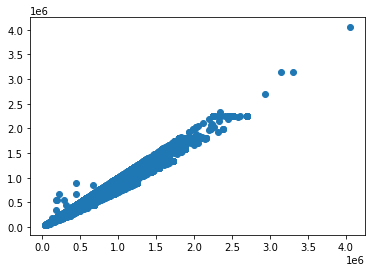

In [42]:
plt.scatter(TRAINDS["AMT_CREDIT"],TRAINDS["AMT_GOODS_PRICE"])

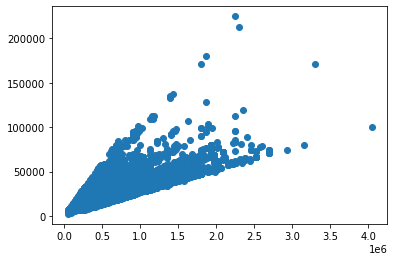

In [43]:
plt.scatter(TRAINDS["AMT_CREDIT"],TRAINDS["AMT_ANNUITY"])

El analisis nos permite identificar que los valores del los creditos son directamente proporcionales al valor de los bienes que respaldan la deuda a pesar de que difiere un poco respecto a la anualidad de los clientes 